# Bank Customer Churn Prediction

## About Dataset

- RowNumber—corresponds to the record (row) number and has no effect on the output
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

### Acknowledgements

Dataset provided by RADHESHYAM KOLLIPARA, https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [164]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [165]:
# Load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

# Look at the data (showing the first 5 rows for brevity)
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [166]:
# Preprocess the data
# Dropping columns that are not useful for the model
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [167]:
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [168]:
# Splitting the dataset into features and target variable
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [169]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting off the training set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting the remaining data equally into validation and test sets

In [170]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [171]:
# Convert arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_val = torch.LongTensor(y_val)

In [172]:
# Creating datasets for PyTorch
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)

In [173]:
# Creating data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

In [174]:
# Define a simple feedforward neural network with a single flattened layer
class SimpleNN1(nn.Module):
    def __init__(self):
        super(SimpleNN1, self).__init__()
        self.fc = nn.Linear(X_train.shape[1], 2)
    
    def forward(self, x):
        x = self.fc(x)
        return x

In [175]:
# Define a simple feedforward neural network with 3 hidden layers and ReLU activation functions
class SimpleNN2(nn.Module):
    def __init__(self):
        super(SimpleNN2, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [176]:
# Define a more complex feedforward neural network with 4 hidden layers, dropout, and ReLU activation functions
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.fc3 = nn.Linear(64, 32)  # Third hidden layer
        self.fc4 = nn.Linear(32, 16)  # Fourth hidden layer
        self.fc5 = nn.Linear(16, 2)  # Output layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(0.5)  # Dropout layer with a 50% drop rate

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Applying dropout after the first hidden layer
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Applying dropout after the second hidden layer
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Applying dropout after the third hidden layer
        x = self.relu(self.fc4(x))
        x = self.fc5(x)  # No dropout before the output layer
        return x

In [177]:
# Instantiate the model, define loss and optimizer
model1 = SimpleNN1()
model2 = SimpleNN2()
model3 = ComplexNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

Training model1


model1 - Epoch [5/40], Training Loss: 0.2397, Validation Loss: 0.2209
model1 - Epoch [10/40], Training Loss: 0.1149, Validation Loss: 0.1080
model1 - Epoch [15/40], Training Loss: 0.0662, Validation Loss: 0.0630
model1 - Epoch [20/40], Training Loss: 0.0430, Validation Loss: 0.0413
model1 - Epoch [25/40], Training Loss: 0.0304, Validation Loss: 0.0295
model1 - Epoch [30/40], Training Loss: 0.0230, Validation Loss: 0.0224
model1 - Epoch [35/40], Training Loss: 0.0183, Validation Loss: 0.0179
model1 - Epoch [40/40], Training Loss: 0.0153, Validation Loss: 0.0151
Training model2
model2 - Epoch [5/40], Training Loss: 0.0082, Validation Loss: 0.0093
model2 - Epoch [10/40], Training Loss: 0.0054, Validation Loss: 0.0106
model2 - Epoch [15/40], Training Loss: 0.0036, Validation Loss: 0.0129
model2 - Epoch [20/40], Training Loss: 0.0017, Validation Loss: 0.0145
model2 - Epoch [25/40], Training Loss: 0.0008, Validation Loss: 0.0162
model2 - Epoch [30/40], Training Loss: 0.0004, Validation Loss:

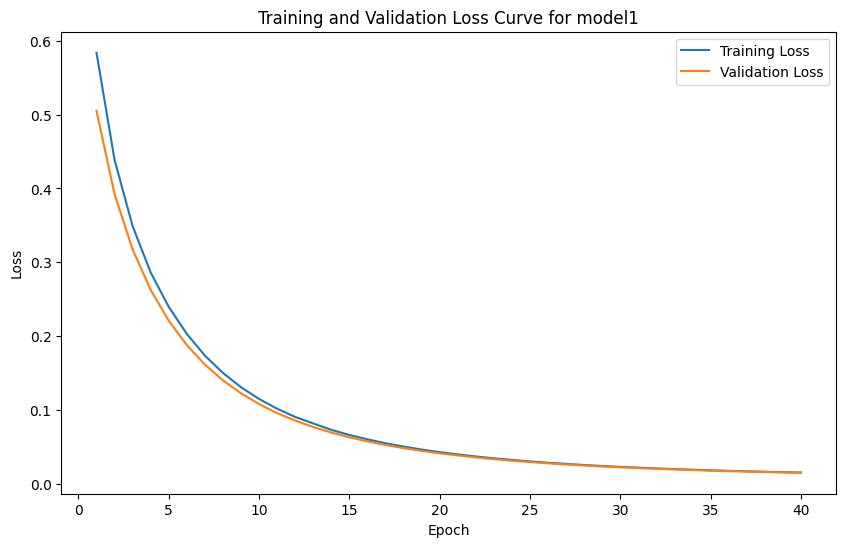

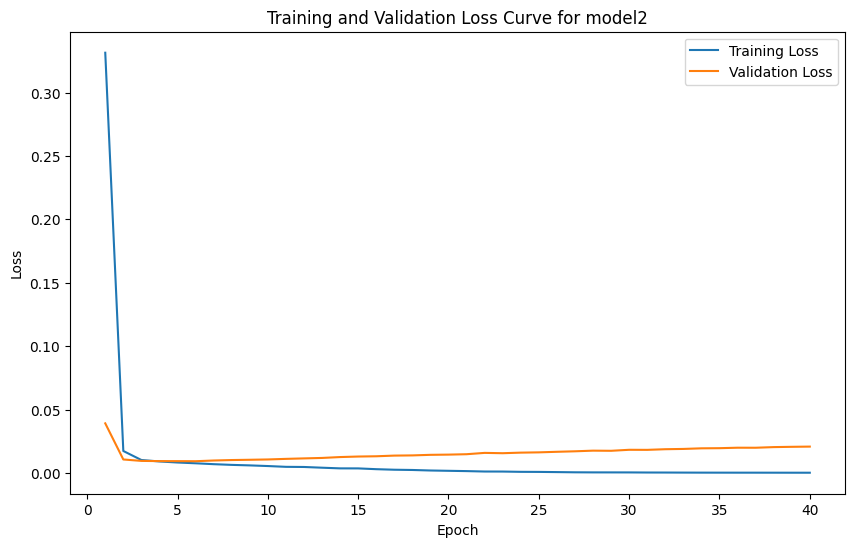

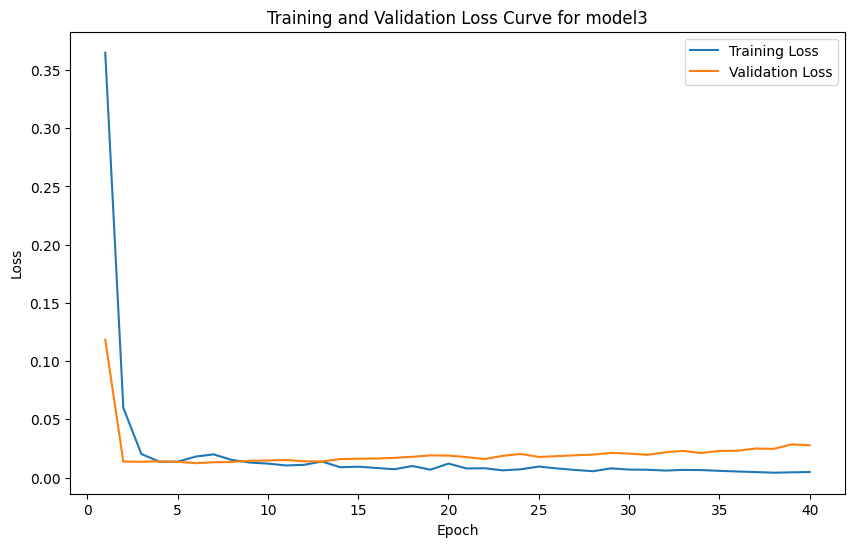

In [178]:
# Training the models, performing validation, and visualizing the training and validation curves for model1, model2, and model3
num_epochs = 40
models = [model1, model2, model3]
model_names = ['model1', 'model2', 'model3']
optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]

# Initialize dictionaries to store training and validation loss values for each model
train_loss_values = {name: [] for name in model_names}
val_loss_values = {name: [] for name in model_names}

for model, optimizer, name in zip(models, optimizers, model_names):
    print(f"Training {name}")
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Calculate average training loss for the epoch
        avg_train_loss = train_loss / len(train_loader)
        train_loss_values[name].append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        # Calculate average validation loss for the epoch
        avg_val_loss = val_loss / len(val_loader)
        val_loss_values[name].append(avg_val_loss)
        
        if (epoch+1) % 5 == 0:
            print(f'{name} - Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# Plotting the training and validation loss curves for each model
for name in model_names:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_loss_values[name], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_loss_values[name], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Curve for {name}')
    plt.legend()
    plt.show()

Accuracy of Model 1 on the test set: 99.86666666666666%
Precision of Model 1: 0.9987
Recall of Model 1: 0.9987
F1 Score of Model 1: 0.9987
Accuracy of Model 2 on the test set: 99.8%
Precision of Model 2: 0.9980
Recall of Model 2: 0.9980
F1 Score of Model 2: 0.9980
Accuracy of Model 3 on the test set: 99.86666666666666%
Precision of Model 3: 0.9987
Recall of Model 3: 0.9987
F1 Score of Model 3: 0.9987


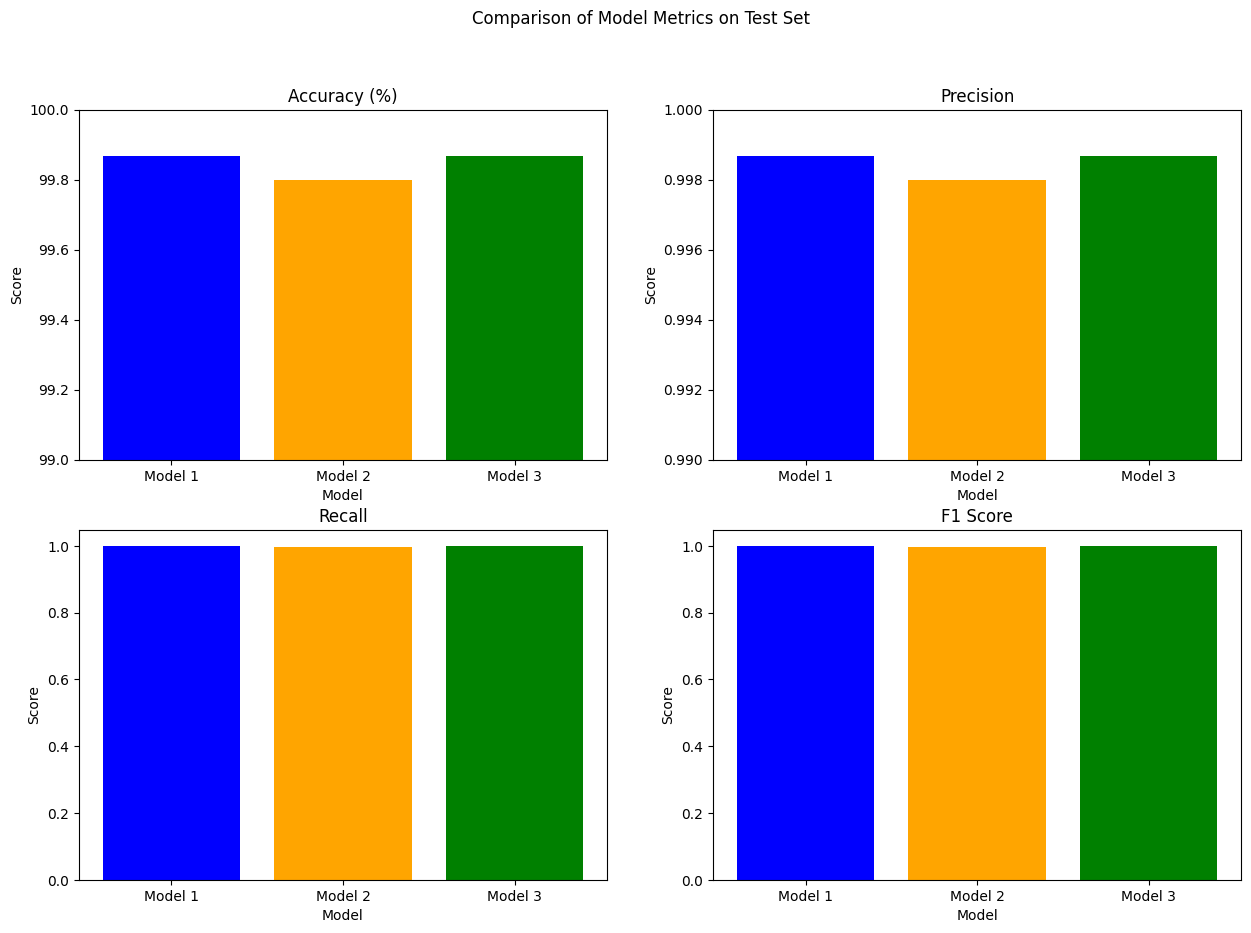

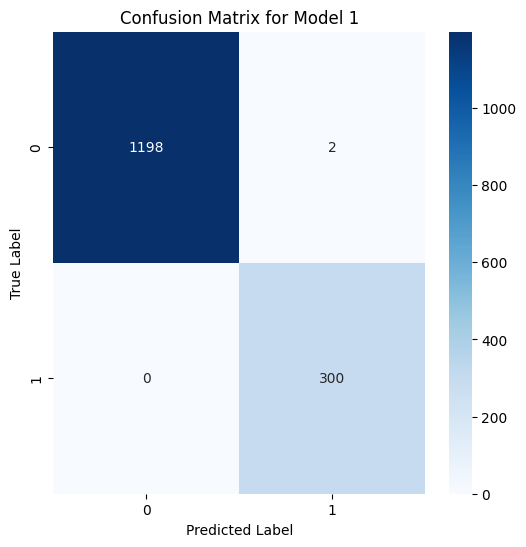

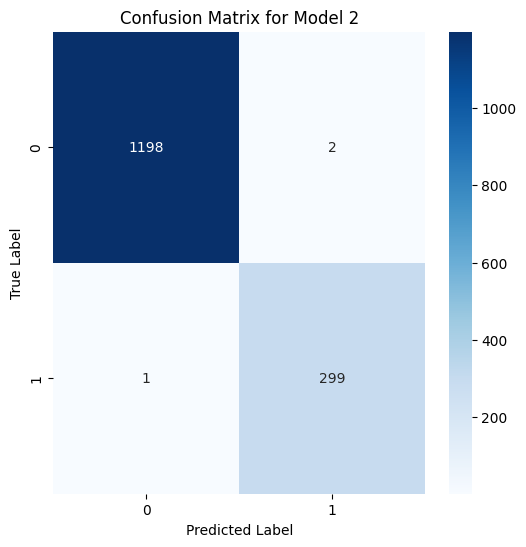

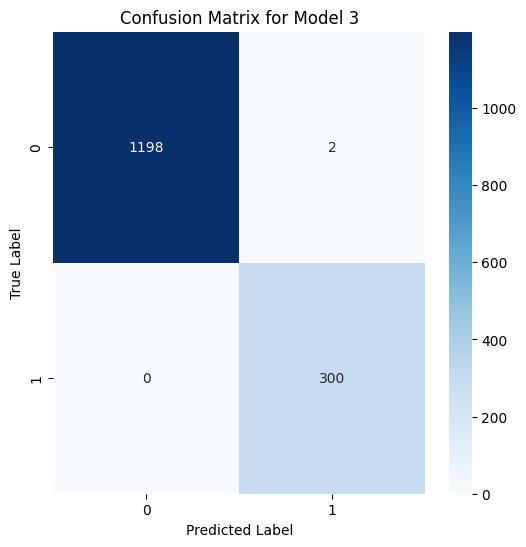

In [179]:
# Evaluate models 1, 2, and 3, compare their accuracies visually, and display confusion matrices along with precision, recall, and F1 scores
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []
model_names = ['Model 1', 'Model 2', 'Model 3']  # Assuming these are the names of models 1, 2, and 3

for model, name in zip(models[:3], model_names):  # Assuming models is a list containing at least 3 models
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predictions.extend(predicted.view(-1).tolist())
            all_labels.extend(labels.view(-1).tolist())
    
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    print(f'Accuracy of {name} on the test set: {accuracy}%')
    
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    confusion_matrices.append(cm)
    
    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    print(f'Precision of {name}: {precision:.4f}')
    print(f'Recall of {name}: {recall:.4f}')
    print(f'F1 Score of {name}: {f1:.4f}')

# Visual comparison of accuracies, precision, recall, and F1 scores
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Model Metrics on Test Set')

axs[0, 0].bar(model_names, accuracies, color=['blue', 'orange', 'green'])
axs[0, 0].set_title('Accuracy (%)')
axs[0, 0].set_ylim(99, 100)

axs[0, 1].bar(model_names, precisions, color=['blue', 'orange', 'green'])
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0.99, 1.0)

axs[1, 0].bar(model_names, recalls, color=['blue', 'orange', 'green'])
axs[1, 0].set_title('Recall')
axs[0, 1].set_ylim(0.99, 1.0)

axs[1, 1].bar(model_names, f1_scores, color=['blue', 'orange', 'green'])
axs[1, 1].set_title('F1 Score')
axs[0, 1].set_ylim(0.99, 1.0)

for ax in axs.flat:
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')

# Display confusion matrices
for cm, name in zip(confusion_matrices, model_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()